  # Multiple linear Regression

###
House Price Prediction






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# creating a house dataset data
data = {
    'area' : [ 1100, 1600, 1800, 2300, 3300, 3700, 4200, 4300, 5500, 6000],
    'bedrooms' :  [ 2, 3, 3, 4, 4, 5, 5, 5, 6, 6],
    'price' : [ 170000, 220000, 230000, 265000, 325000, 385000, 415000, 428000, 489000, 520000]
}
df = pd.DataFrame(data)

In [3]:
x = df[['area','bedrooms']] #independent
y = df['price'] #dependent

# Model Training
model = LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
# Show intercept and model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 65724.34139449848
Coefficients: [   55.45666085 21286.54533367]


In [5]:
#prediction for area=2500, 4bedrooms
new_house = pd.DataFrame({'area': [2500], 'bedrooms': [4]})
pred_price = model.predict(new_house)
print(f"predicted price for {new_house['area'][0]} area and {new_house['bedrooms'][0]} bedrooms is",round(pred_price[0],2))

predicted price for 2500 area and 4 bedrooms is 289512.17


# visualization

In [6]:
# you have two input variables (features):
# area (square feet), bedrooms and one output variable: price
# means the model is trying to fit a plane(not just a line) through the data.
# creating 3D Visualization
x_range = np.linspace(df.area.min(), df.area.max(), 20)
y_range = np.linspace(df.bedrooms.min(), df.bedrooms.max(), 20)
# That number is just how many points
# You want to use to make the grid for the surface
x_surf,y_surf = np.meshgrid(x_range,y_range)

In [7]:
# predict values for the surface
z_surf = model.predict(pd.DataFrame({'area':x_surf.ravel(), 'bedrooms': y_surf.ravel()}))
# note: x_surf.ravel() and y_surf.ravel() : flatten the grid into 1d arrays,
#because model.predict() needs a table of points.
z_surf = z_surf.reshape(x_surf.shape)

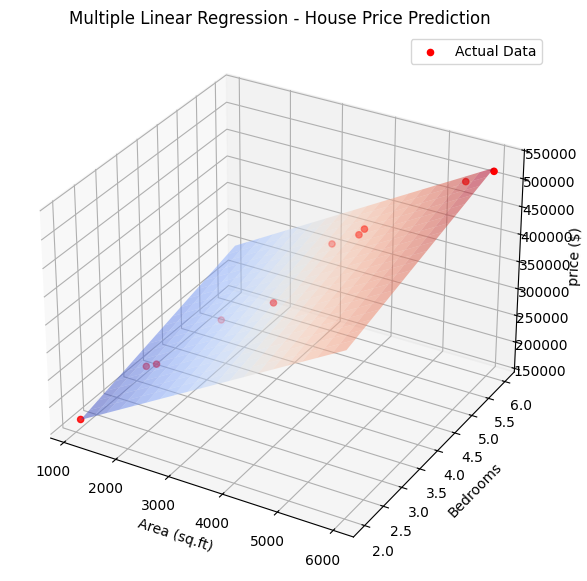

In [13]:
#converts predictions back into a grid so it matches x_surf and y_surf for plotting a surface 
# plot the 3d surface
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection='3d')
#make 1 row x 1column of subplots and pick the first subplot
#actual Data Points
ax.scatter(df['area'],df['bedrooms'],df['price'],color='red',label='Actual Data')
#regression plane
ax.plot_surface(x_surf,y_surf,z_surf,alpha=0.5,cmap='coolwarm')
ax.set_xlabel("Area (sq.ft)")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("price ($)")
ax.set_title('Multiple Linear Regression - House Price Prediction')
ax.legend()
plt.show()